## Mathematical Expectation Estimation


### Convergence of the sample mean

Demonstration of the convergence of the arithemtic mean of the given samples $\overline X=\frac{X_1+\ldots+X_n}n$ to the true mathematical expectation $\mu$.

In [1]:
import ipywidgets as widgets
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np

def mean_plot(sigma, n, r):
# n: number of samples
# r: number of experiments

    x = range(1,n+1)
    for i in range(r):
        y = np.random.normal(0, sigma, n)
        m = np.cumsum(y)/x   # sequence of means, cumsum() gives cumulative sum, we divide it with the number of samples x
        plt.plot(x, m)

    # plotting of the curves which are +- one standard deviation of the mean (sigma/sqrt(n))
    z = sigma/np.sqrt(x)
    plt.plot(x, z,'k--')
    plt.plot(x, -z, 'k--')


    plt.gcf().set_size_inches(10,5)
    plt.grid()
    plt.show()

In [2]:
widgets.interact(mean_plot,
                 sigma=widgets.IntSlider(min=0.1, max=10,description='Standard deviation', step=1, value=1),
                 n=widgets.IntSlider(min=10, max=1000,description='Number of samples', step=10, value=100),
                 r=widgets.IntSlider(min=1, max=10,description='Number of experiments', step=1, value=5))

interactive(children=(IntSlider(value=1, description='Standard deviation', max=10), IntSlider(value=100, descr…

<function __main__.mean_plot(sigma, n, r)>

### Exercise: plot similar curves for other distributions, e.g. Bernoulli, Exponential, Uniform, Poisson...

## Confidence interval for Mathematical Expectation

[[1 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 1 1]
 ...
 [0 1 1 ... 1 1 0]
 [0 1 0 ... 1 0 1]
 [1 0 0 ... 0 1 0]]


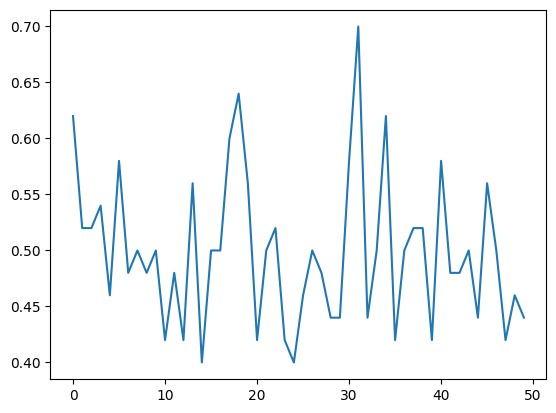

In [ ]:
## for Bernoulli RV - ME is probability of success p, variance is p(1-p)

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

p=0.5

number_of_samples = 50 # number of samples for calculation of one arithmetic mean (i.e. probaiblity of success)
number_of_samples_of_the_mean = 50 # number of samples of arithemtic means

b = stats.bernoulli(p) # success probability is p
xs = b.rvs(number_of_samples*number_of_samples_of_the_mean).reshape(number_of_samples,-1)
print(xs)
samples_of_means = np.mean(xs,axis=0) # samples of means
plt.plot(samples_of_means)
plt.show()

In [ ]:
samples_of_means[0]

0.62

In [ ]:
# confidence interval (CI) calculated using the first set of 50 samples (on which we found samples_of_means[0]):

# assume that we KNOW THE VARIANCE (if we don't know it, we have to estimate it - in that case we use t-distirbution for CI)
var = p*(1-p)
std = var**0.5

alpha = 0.05  # level of confidence is 1-alpha=0.95

print(samples_of_means[0])  # we print the point estimate

# FIRST METHOD - Reduction to Z-distribution (N(0,1))
quantile_order = 1-alpha/2


Quantile = stats.norm.ppf(quantile_order)  # Qunatile of appropriate order of the Z distribution
margin = Quantile * (std/number_of_samples**0.5)

confidence_interval = (samples_of_means[0] - margin, samples_of_means[0] + margin)
print(confidence_interval)

# SECOND METHOD:
margin1 = stats.norm.ppf(quantile_order, loc=0, scale=std/number_of_samples**0.5)

confidence_interval1=(samples_of_means[0] - margin1, samples_of_means[0] + margin1)
print(confidence_interval1)

#THIRD METHOD - in one line
confidence_interval2=stats.norm.interval(1-alpha,loc=samples_of_means[0], scale=std/number_of_samples**0.5)
print(confidence_interval2)

0.62
(0.4814096175650322, 0.7585903824349678)
(0.4814096175650322, 0.7585903824349678)
(0.4814096175650322, 0.7585903824349678)


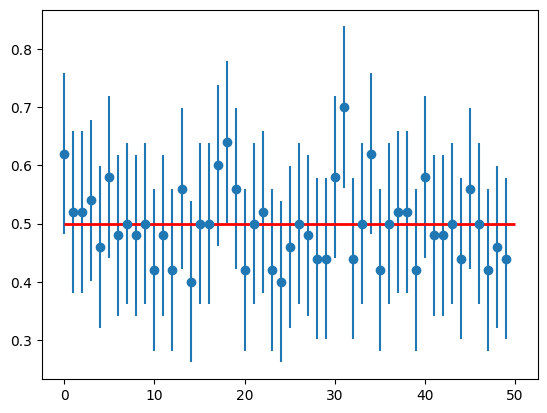

In [ ]:
# for each sample (point estimate) we get appropriate 1-alpha confidence interval:

CIs=[]
for i in range(0,number_of_samples_of_the_mean):
    CIs.append((samples_of_means[i] - margin, samples_of_means[i] + margin))

# plotting of intervals

plt.figure()

# we use plt.errorbar:
plt.errorbar(x=np.arange(0, number_of_samples_of_the_mean),
             y=samples_of_means[0:number_of_samples_of_the_mean],
             yerr=[abs((up-down)/2) for up,down in CIs],
             fmt='o')

plt.hlines(xmin=0, xmax=number_of_samples_of_the_mean,
           y=p,
           linewidth=2.0,
           color="red")

plt.show()

### Exercise 1: Do the same if the samples are taken from a) normal b) exponential distribution.

### Exercise 2: Read the data from the file temeprature.csv, choose a city, estimate ME of the temperetures and find 90%, 95% and 99% confidence intervals.

## Estimation of the mean of the population from a sample

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

atributi = ['Detroit']
df = pd.read_csv("temperature.csv",usecols=atributi)
df.head()
df.shape

(17646, 1)

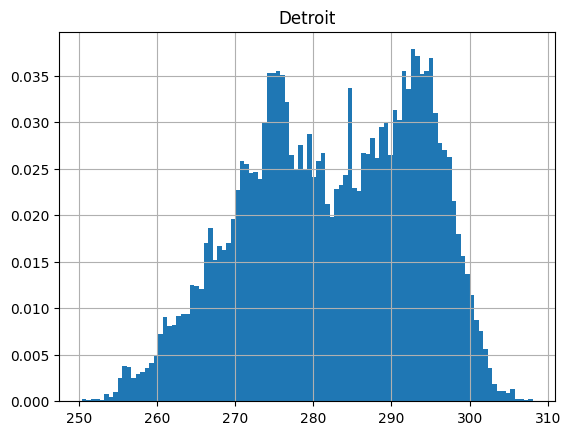

In [ ]:
#histogram
hist = df.hist(density=True,bins=100)
plt.show()

In [ ]:
df.describe() # this calculates true parameters (for the whole population) which we will try to estiamte from a small sample

,Detroit
count,17645.000000
mean,282.446001
std,11.048916
min,250.400000
25%,274.100000
50%,283.020000
75%,292.020000
max,308.050000


In [ ]:
sample = df.sample(10)
sample.values.mean()

280.9878

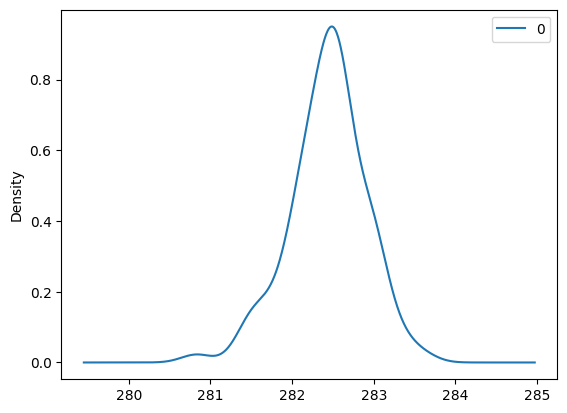

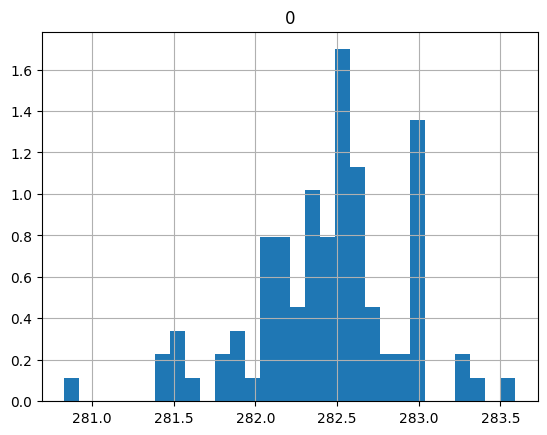

In [ ]:
# we want to estiamte true mean by taking only a small sample from the population:
mean_estimators = []

sample_size = 500
number_of_mean_estimators = 100
for x in range(number_of_mean_estimators):

    sample = df.sample(sample_size)
    mean_estimators.append(sample.values.mean())

    # or:
    #sample = np.random.choice(a= df.values, size=sample_size)
    #mean_estimators.append( sample.mean() )

# we plot an estimate of the PDF of the obtained means (using histogram) - we see that it is close to normal (CLT)!
pd.DataFrame(mean_estimators).plot(kind="density")

# histogram of mean values:
hist = pd.DataFrame(mean_estimators).hist(density=True,bins=30)
plt.show()

In [ ]:
# confidence_intervals:

std=df.std()['Detroit']

alpha=0.05   # level of confidence is 1-alpha=0.95

print(mean_estimators[0]) # printing of the point estimate

quantile_order = 1-alpha/2
Quantile = stats.norm.ppf(quantile_order)  # Qunatile of appropriate order of the Z distribution

margin = Quantile * (std/sample_size**0.5)

confidence_interval = (mean_estimators[0] - margin, mean_estimators[0] + margin)
print(confidence_interval)

282.31282526811594
(281.34436291350266, 283.2812876227292)


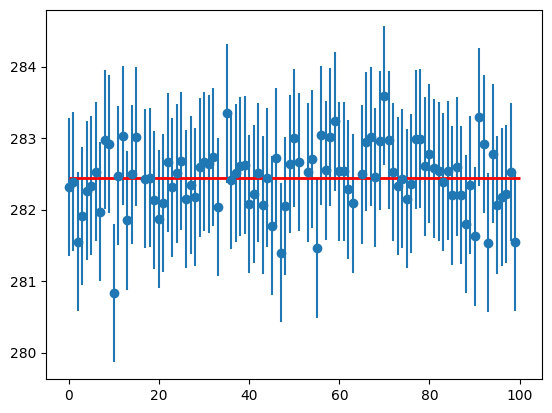

In [ ]:
# plotting of all CIs:

CIs=[]
for i in range(0,number_of_mean_estimators):
    CIs.append((mean_estimators[i] - margin, mean_estimators[i] + margin))

# plotting:

plt.figure()

# plt.errorbar:
plt.errorbar(x=np.arange(0, number_of_mean_estimators),
             y=mean_estimators[0:number_of_mean_estimators],
             yerr=[abs((up-down)/2) for up,down in CIs],
             fmt='o')

plt.hlines(xmin=0, xmax=number_of_mean_estimators,
           y=df.mean()['Detroit'],
           linewidth=2.0,
           color="red")

plt.show()

## Confidence interval of ME when the VARIANCE IS UNKNOWN

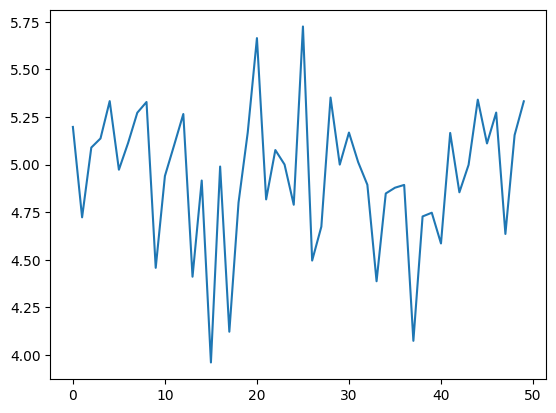

In [ ]:
# In this case, when n is relatively small, instead of qunatiles of normal distribution, we tak qunatiles of t-distribution with
# n=1 degrees of freedom
# When n is relatively large (larger than 30) we can again use normal distribution,
# with estimated variance instead of the true variance

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


m=5
sigma=3

number_of_samples = 50 # number of samples for calculation of one arithmetic mean (i.e. probaiblity of success)
number_of_samples_of_the_mean=50 # number of samples of arithemtic means

rv= stats.norm(m,sigma)
xs = rv.rvs(number_of_samples*number_of_samples_of_the_mean).reshape(number_of_samples,-1)
samples_of_means = np.mean(xs,axis=0) # samples of means
plt.plot(samples_of_means)
plt.show()



In [ ]:
# ESTIMATE of standard deviation:
samples_std = np.std(xs, axis=0, ddof=1) # samples of the std estimator

alpha=0.05   # level of confidence is 1-alpha=0.95

print(samples_of_means[0])  # we print the point estimate

# FIRST METHOD - Reduction to t-distribution
quantile_order = 1-alpha/2

# Qunatile of appropriate order of the distribution
Quantile = stats.t.ppf(quantile_order, df=number_of_samples-1)

margin = Quantile * (samples_std[0]/number_of_samples**0.5)

confidence_interval = (samples_of_means[0] - margin, samples_of_means[0] + margin)
print(confidence_interval)

# SECOND METHOD:
margin1=stats.t.ppf(quantile_order, df=number_of_samples-1, loc=0, scale=samples_std[0]/number_of_samples**0.5)

confidence_interval1=(samples_of_means[0] - margin1, samples_of_means[0] + margin1)
print(confidence_interval1)

#THIRD METHOD - in one line
confidence_interval2=stats.t.interval(1-alpha,df=number_of_samples-1,loc=samples_of_means[0], scale=samples_std[0]/number_of_samples**0.5)
print(confidence_interval2)

5.197701542425906
(4.255481824064296, 6.139921260787516)
(4.255481824064296, 6.139921260787516)
(4.255481824064296, 6.139921260787516)


In [ ]:
# if we use normal distribution qunatiles we get somewhat tighter interval

confidence_interval3=stats.norm.interval(1-alpha,loc=samples_of_means[0], scale=samples_std[0]/number_of_samples**0.5)
print(confidence_interval3)


(3.880832612601055, 5.659341353789796)


### Example 3: Repeat the estimation of the mean of the population from small sample, for smaller sample size (e.g. n=20) - compare the CIs obtained using t-statistics and using its normal approximation